Установка необходимых библиотек

In [8]:
pip install pandas scikit-learn seaborn

Загрузка и предварительный анализ данных

In [9]:
import pandas as pd
import seaborn as sns

# Загрузка датасета Titanic
data = sns.load_dataset('titanic')

# Просмотр первых строк данных
print(data.head())

# Описание данных
print(data.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

Устранение пропусков в данных

In [10]:
# Проверка на наличие пропусков
print(data.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [11]:
# Заполнение пропусков для числовых признаков
data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)

# Заполнение пропусков для категориальных признаков
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
data['deck'] = data['deck'].cat.add_categories('Unknown').fillna('Unknown')
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)
data['alive'].fillna(data['alive'].mode()[0], inplace=True)


Кодирование категориальных признаков

In [12]:
# Список категориальных признаков
categorical_features = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'adult_male', 'alone']

# Применение One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_features)

print(data_encoded.head())


   survived  pclass   age  sibsp  parch     fare  sex_female  sex_male  \
0         0       3  22.0      1      0   7.2500       False      True   
1         1       1  38.0      1      0  71.2833        True     False   
2         1       3  26.0      0      0   7.9250        True     False   
3         1       1  35.0      1      0  53.1000        True     False   
4         0       3  35.0      0      0   8.0500       False      True   

   embarked_C  embarked_Q  ...  deck_Unknown  embark_town_Cherbourg  \
0       False       False  ...          True                  False   
1        True       False  ...         False                   True   
2       False       False  ...          True                  False   
3       False       False  ...         False                  False   
4       False       False  ...          True                  False   

   embark_town_Queenstown  embark_town_Southampton  alive_no  alive_yes  \
0                   False                     True   

Нормализация числовых признаков

In [13]:
from sklearn.preprocessing import StandardScaler

# Список числовых признаков
numeric_features = ['age', 'fare', 'sibsp', 'parch']

# Инициализация StandardScaler
scaler = StandardScaler()

# Применение стандартизации
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

print(data_encoded.head())


   survived  pclass       age     sibsp     parch      fare  sex_female  \
0         0       3 -0.565736  0.432793 -0.473674 -0.502445       False   
1         1       1  0.663861  0.432793 -0.473674  0.786845        True   
2         1       3 -0.258337 -0.474545 -0.473674 -0.488854        True   
3         1       1  0.433312  0.432793 -0.473674  0.420730        True   
4         0       3  0.433312 -0.474545 -0.473674 -0.486337       False   

   sex_male  embarked_C  embarked_Q  ...  deck_Unknown  embark_town_Cherbourg  \
0      True       False       False  ...          True                  False   
1     False        True       False  ...         False                   True   
2     False       False       False  ...          True                  False   
3     False       False       False  ...         False                  False   
4      True       False       False  ...          True                  False   

   embark_town_Queenstown  embark_town_Southampton  alive_no  

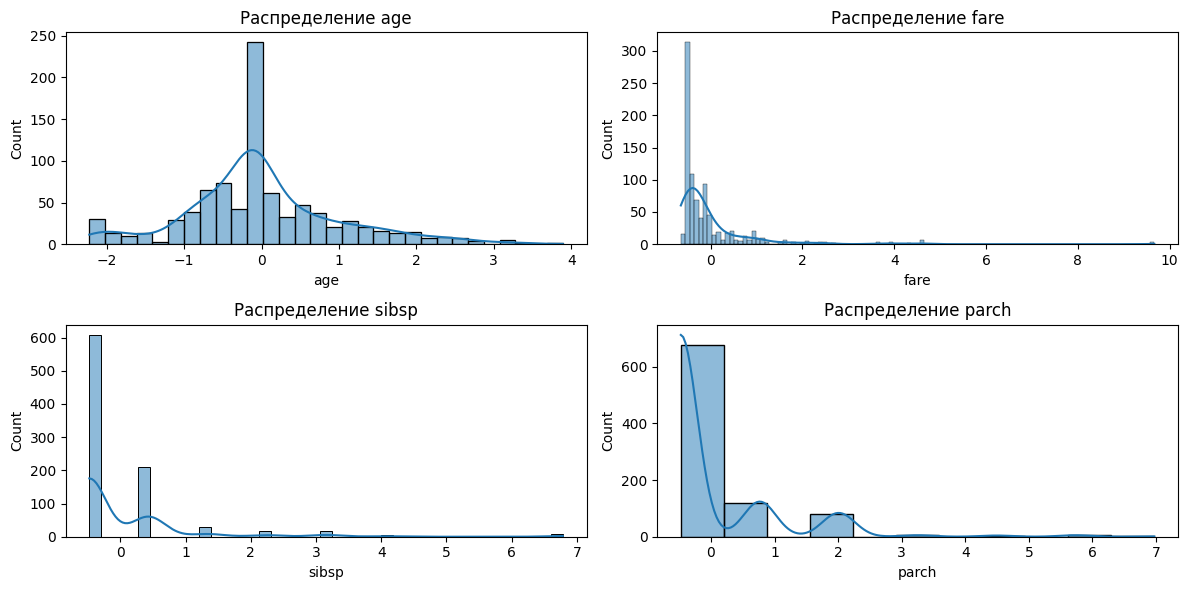

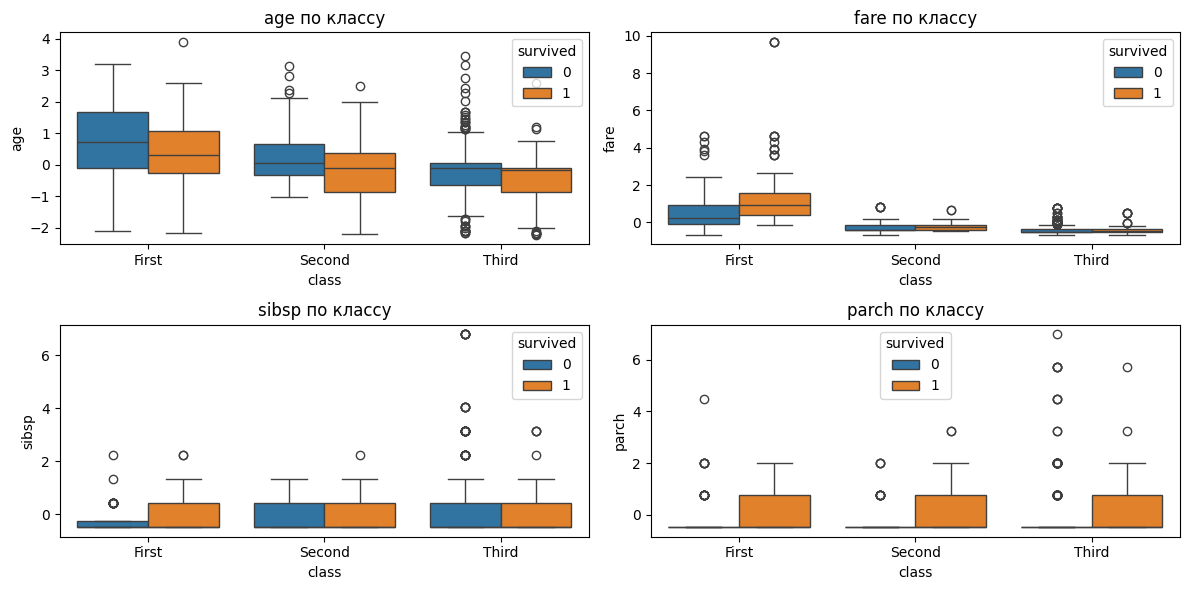

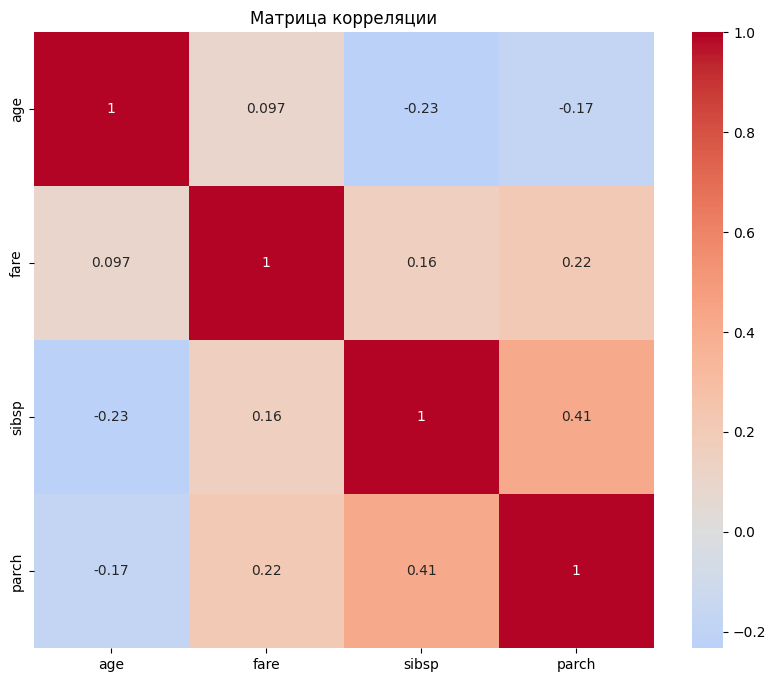

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Визуализация: гистограммы
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Распределение {feature}')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

# Визуализация: ящики с усами
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='class', y=feature, hue='survived', data=data)
    plt.title(f'{feature} по классу')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

# Визуализация: тепловая карта
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции')
plt.savefig('correlation_heatmap.png')
plt.show()
